# Matplotlib

## About

`Matplotlib` is like the Swiss Army knife of Python plotting libraries. It’s very versatile and powerful, allowing us to create a wide range of static, animated, and interactive plots. Think of it as the foundation for other plotting libraries.

- Strengths:
  - Very flexible and customizable.
  - Can create almost any kind of plot.
  - Large community and extensive documentation.

- Weaknesses:
  - Sometimes can be more complex and code-heavy for simple plots.
  - Default aesthetics can be basic and may require customization to look modern.

## Matplotlib Fundamentals

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
# %matplotlib inline 
## no interaction

# %matplotlib qt
## interactive but run outside VS Code

%matplotlib widget
## interactive inside VS Code (need to clearly call plt.figure() every time before creating the plot)

In [2]:
x = [0, 2, 6, 8, 10]
y = [1, 5, 20, 30, 50]

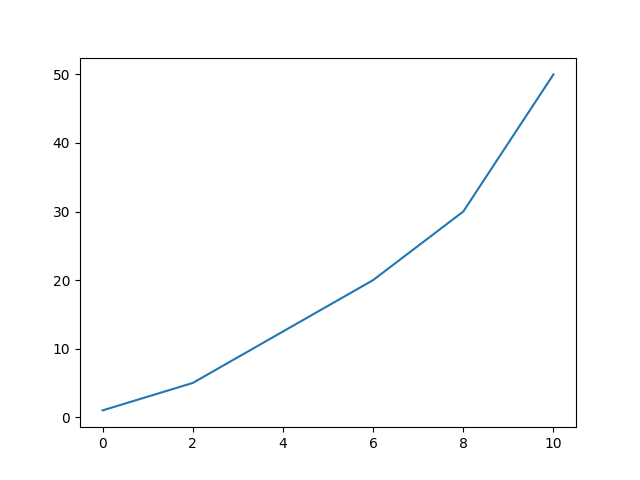

In [3]:
# simple line chart
plt.figure()
plt.plot(x, y)
plt.show()

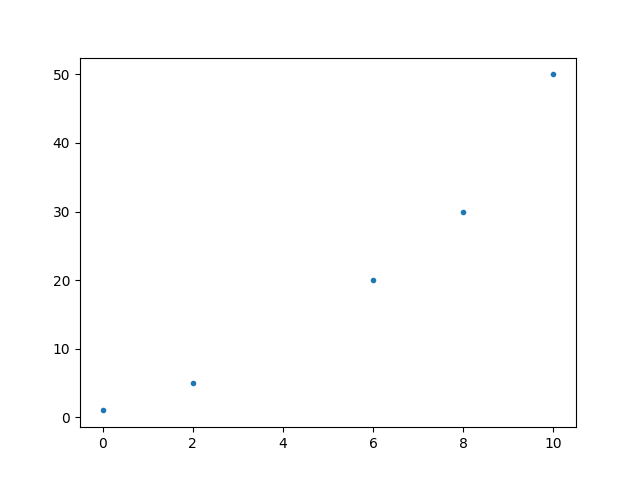

In [4]:
# show dots instead of a line
plt.figure()
plt.plot(x, y, '.')
plt.show()

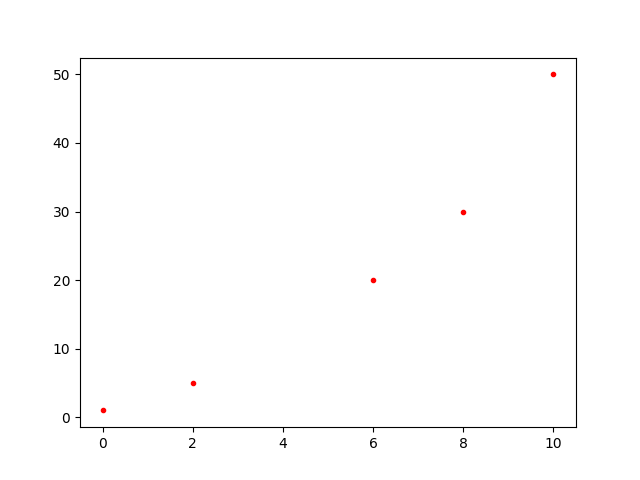

In [5]:
# show red dots instead of blue ones
plt.figure()
plt.plot(x, y, '.r')
plt.show()

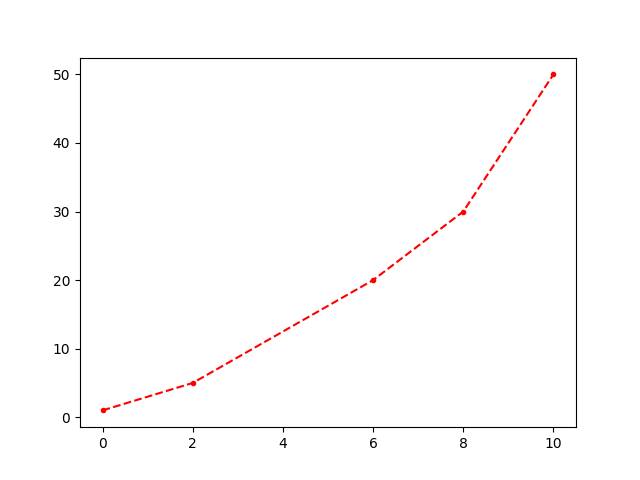

In [6]:
# connect the dots with dashed lines
plt.figure()
plt.plot(x, y, 'r.--')
plt.show()

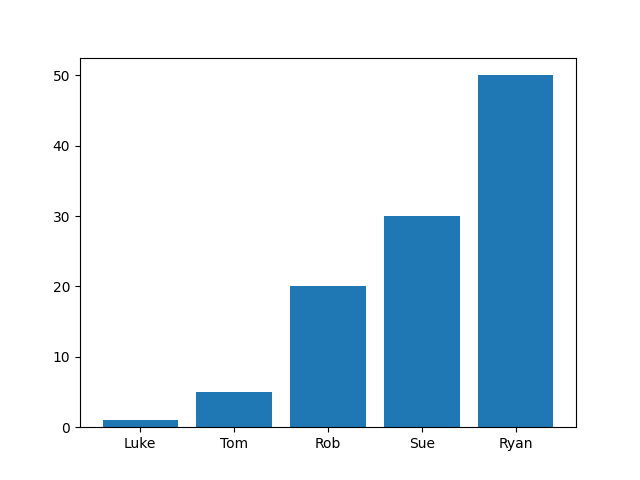

In [7]:
# show a bar char
xstr = ['Luke', 'Tom', 'Rob', 'Sue', 'Ryan']

plt.figure()
plt.bar(xstr, y)
plt.show()

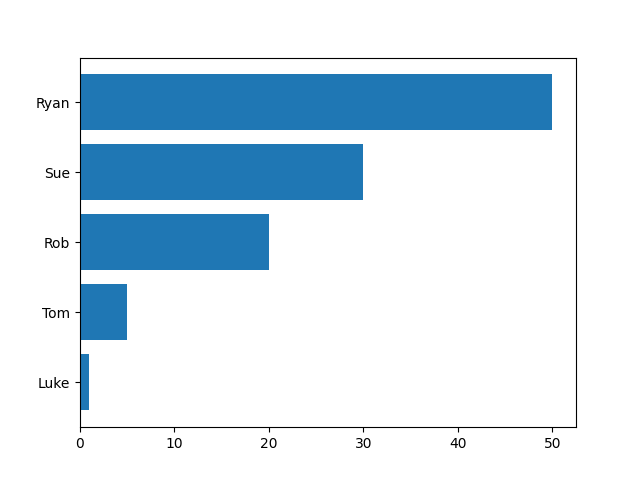

In [8]:
# show horizontal bar chart
plt.figure()
plt.barh(xstr, y)
plt.show()

## Chart Styles

In [9]:
# show all different style options
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

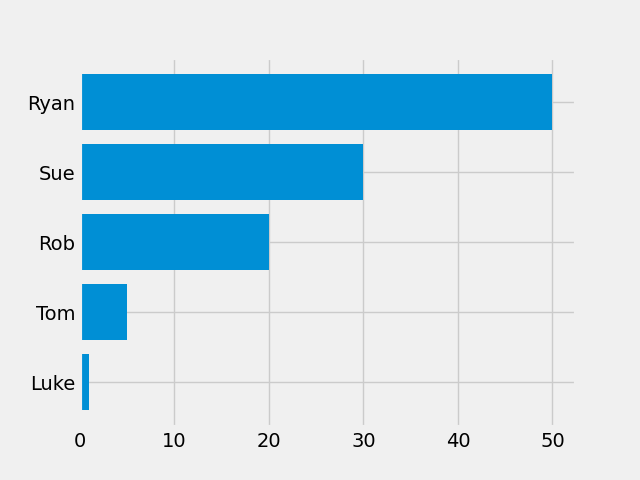

In [10]:
plt.figure()
plt.style.use('fivethirtyeight')
plt.barh(xstr,y)
plt.show()

## Charts with multiple lines or bars

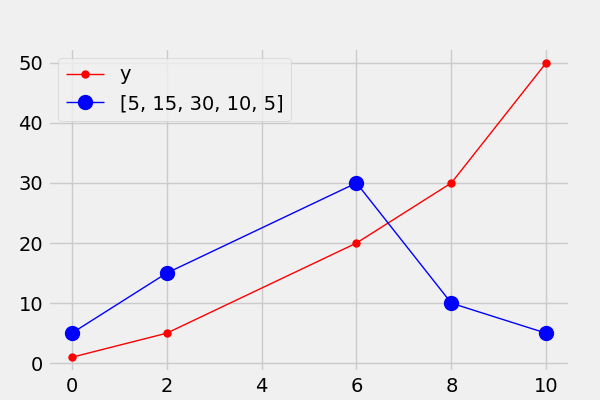

In [11]:
y2 = [5, 15, 30, 10, 5]

plt.figure(figsize=(6, 4), dpi=100)
plt.plot(x, y, '.-r', markersize=10, linewidth=1, label='y')
plt.plot(x, y2, 'o-b', markersize=10, linewidth=1, label=str(y2))
plt.legend()
plt.show()

## Stacked bar charts

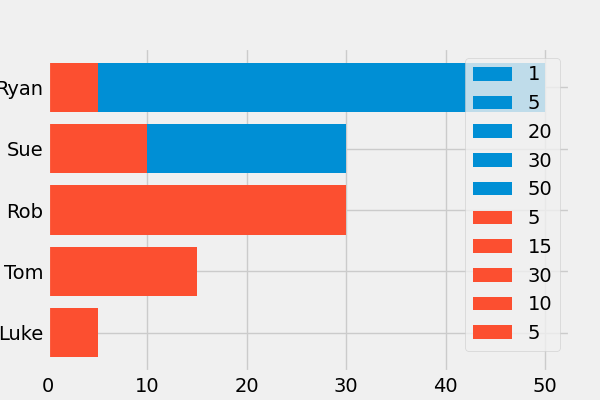

In [12]:
plt.figure(figsize=(6, 4), dpi=100)
plt.barh(xstr, y, label=y)
plt.barh(xstr, y2, label=y2)
plt.legend()
plt.show()

## Scatter Plots

### Understanding the `s` parameter

The s parameter in scatter() is used to define the size of each marker (data point). You can pass a single scalar value, an array, or a list to this parameter:

1. **Single Scalar Value**: If you pass a single scalar value (e.g., s=50), all markers in the scatter plot will have the same size.

```python
plt.scatter(x, y, s=50)
```

2. **Array or List**: If you pass an array or list of sizes (e.g., s=[10, 20, 30, 40, 50]), each marker will be sized according to the corresponding element in the array. The length of this array or list should match the number of data points you have.

```python
sizes = np.array([10, 20, 30, 40, 50])

plt.scatter(x, y, s=sizes)
```

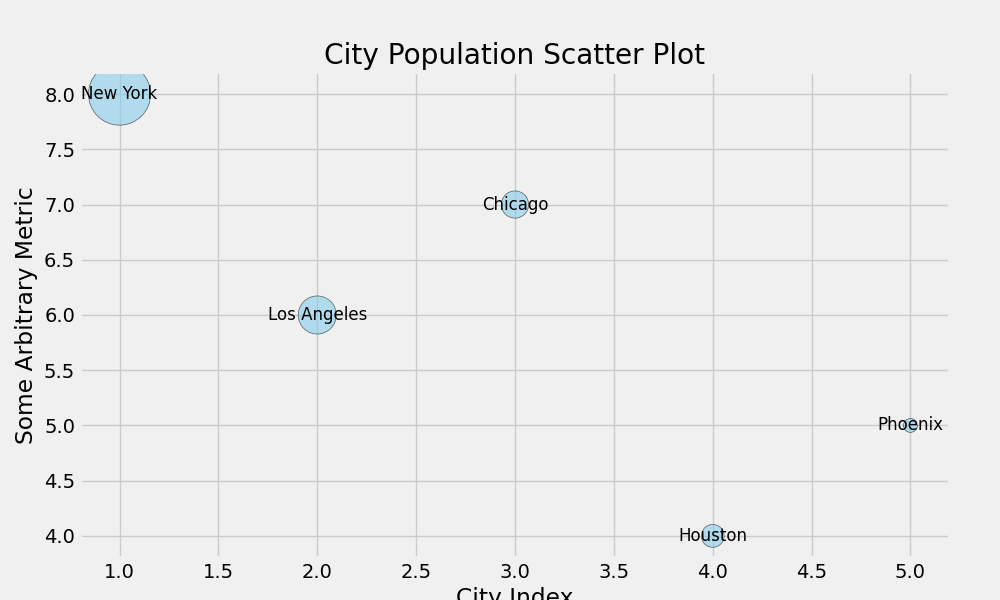

In [13]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data: cities and their respective populations
cities = ['New York', 'Los Angeles', 'Chicago', 'Houston', 'Phoenix']
x = np.array([1, 2, 3, 4, 5])  # x-coordinates for cities
y = np.array([8, 6, 7, 4, 5])  # y-coordinates for cities
populations = np.array([8.4, 4.0, 2.7, 2.3, 1.7])  # Population in millions

# Convert population to a suitable size for plotting
# sizes = np.array(populations) * 100  # Linear scaling
sizes = np.interp(populations, (populations.min(), populations.max()), (100, 2000))  # data interpolation

# Create scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(x, y, s=sizes, alpha=0.6, color='skyblue', edgecolors='black')

# Add labels for cities
for i, city in enumerate(cities):
    plt.text(x[i], y[i], city, fontsize=12, ha='center', va='center')

# Label axes
plt.xlabel('City Index')
plt.ylabel('Some Arbitrary Metric')
plt.title('City Population Scatter Plot')

# Show the plot
plt.show()

*for more details on data interpolation, a practice of Data Normalization, refer to [Data Normalization](../numpy/numpy.ipynb#data-normalization)*

## Dealing with large datasets

When dealing with hundreds of thousands of data points in a scatter plot, dynamically calculating and plotting sizes becomes more complex. Here are some strategies to deal with large datasets:

### Markersize Normalization

Normalize the sizes to fit within a reasonable range. This ensures that even with large data sets, marker sizes remain visually manageable.

In [14]:
import numpy as np

item_price_float= np.random.uniform(10, 50, 100000)
print(item_price_float)
print(len(item_price_float))

[27.33518226 26.83283614 30.474708   ... 13.15535388 47.59336595
 46.88266756]
100000


In [15]:
quantity = np.random.uniform(10, 50, 100000)
print(quantity)
print(quantity.min(), quantity.max())

[23.28079679 26.2773858  26.52315267 ... 29.2078406  19.72061975
 49.17499406]
10.00005153966358 49.99991868969052


In [16]:
sizes = np.interp(quantity, (quantity.min(), quantity.max()), (10, 200))
sizes

array([ 73.08374945,  87.31759452,  88.48499106, ..., 101.23730106,
        56.17285237, 196.08159501])

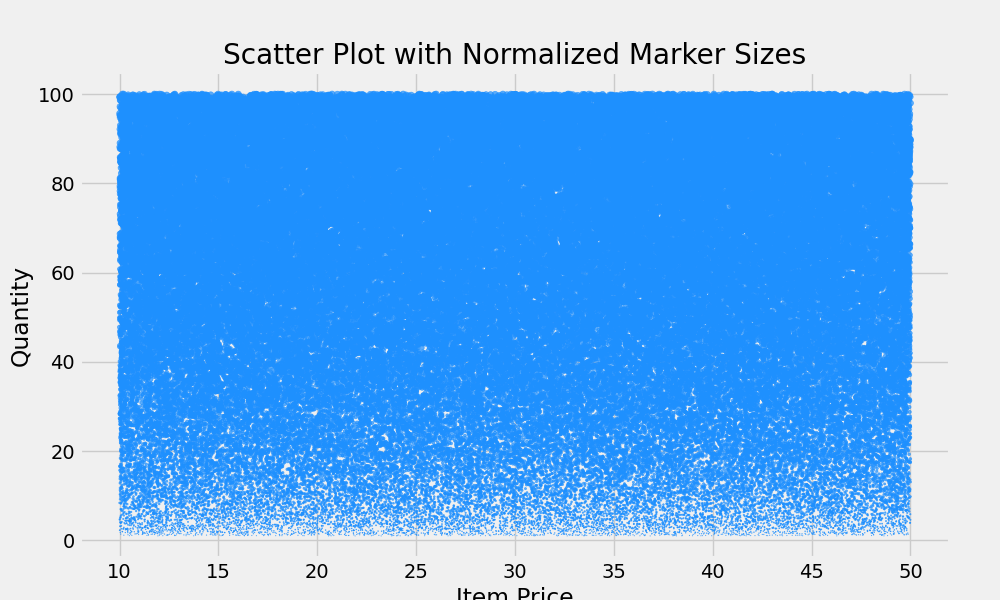

In [17]:
import numpy as np
import matplotlib.pyplot as plt

# Sample data
item_totals = {
    'item_price_float': np.random.uniform(10, 50, 100000),
    'quantity': np.random.uniform(1, 100, 100000)
}

# Normalize sizes between 10 and 200
sizes = np.interp(item_totals['quantity'], (item_totals['quantity'].min(), item_totals['quantity'].max()), (0.1, 20))

plt.figure(figsize=(10, 6))
plt.scatter(
    item_totals['item_price_float'],  # x-axis data
    item_totals['quantity'],          # y-axis data
    color='dodgerblue',              # color of the markers
    alpha=0.7,                       # transparency level of the markers
    s=sizes                        # sizes of the markers
)

plt.xlabel('Item Price')
plt.ylabel('Quantity')
plt.title('Scatter Plot with Normalized Marker Sizes')
plt.show()

### Downsampling

If plotting all data points is too slow or cluttered, consider downsampling to plot a representative subset:

       item_price_float   quantity
3582          15.976422  31.660432
60498         43.885752  65.801932
53227         40.133240  29.360964
21333         38.229986  28.473625
3885          27.421272  30.426745
...                 ...        ...
89555         36.591080  26.519916
88135         39.665582  82.636960
51888         20.084909  33.587622
51380         23.177981  38.101432
67294         47.804501  13.900236

[10000 rows x 2 columns]


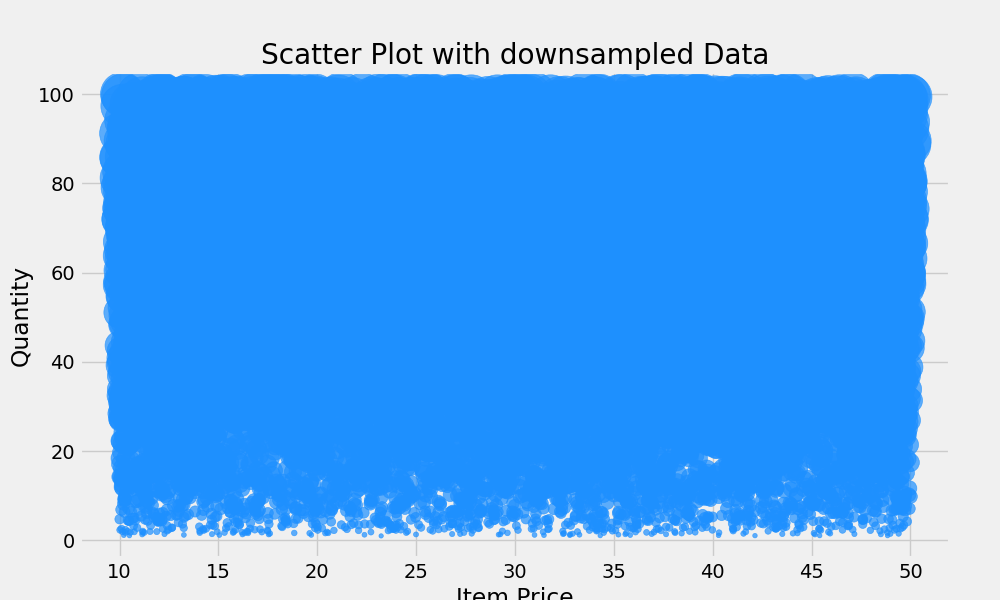

In [18]:
import pandas as pd

# Convert to DataFrame
df = pd.DataFrame(item_totals)

# Randomly sample 10,000 points for visualization
df_sample = df.sample(n=10000, random_state=0)

print(df_sample)

plt.figure(figsize=(10, 6))
plt.scatter(
    df_sample['item_price_float'],  # x-axis data
    df_sample['quantity'],          # y-axis data
    color='dodgerblue',            # color of the markers
    alpha=0.7,                     # transparency level of the markers
    s=df_sample['quantity'] * 10   # sizes of the markers
)

plt.xlabel('Item Price')
plt.ylabel('Quantity')
plt.title('Scatter Plot with downsampled Data')
plt.show()

NOTE:

- `n` is a parameter specifying the number of rows to randomly sample from the DataFrame, i.e., when setting n=10000, you are instructing pandas to randomly select 10,000 rows from the DataFrame df.

- For n=10000, if there are less than 10000 rows in the dataset, a `ValueError` will be thrown. In this case, we can set a parameter `replace` of the `sample` method to `True`. `df.sample(n=10000, replace=True)`. This feature allows Python to randomly pick the existing rows to fill up the number of sample rows. In other words, some rows of the dataset will be repeated in order to make up to 10,000 rows.

- `random_state` simply ensures that the results of random operations are reproducible. You can set it to any integer you want. Using the same integer value for random_state will produce the same result every time you run the code, making your results consistent and reproducible (this is crucial for debugging).



### Adaptive Binning

For very large datasets, you might consider adaptive binning or hexbin plots to aggregate data points into bins:

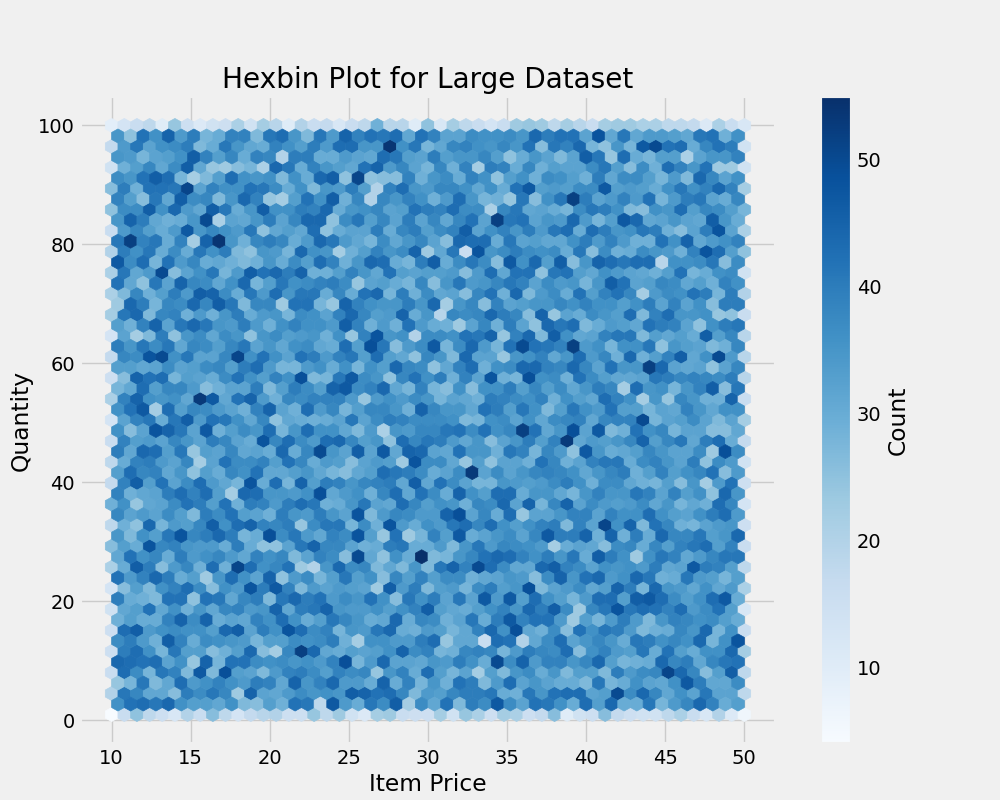

In [19]:
plt.figure(figsize=(10, 8))
plt.hexbin(
    item_totals['item_price_float'],  # x-axis data
    item_totals['quantity'],          # y-axis data
    gridsize=50,                      # Size of the bins
    cmap='Blues',                     # Color map for the bin counts
    mincnt=1                          # Minimum count to plot a hexagon
)

plt.colorbar(label='Count')
plt.xlabel('Item Price')
plt.ylabel('Quantity')
plt.title('Hexbin Plot for Large Dataset')
plt.show()

### Summary

- Normalization: Adjust sizes to fit within a manageable range.
- Downsampling: Plot a subset of data points to improve performance and clarity.
- Adaptive Binning/Hexbin: Aggregate data into bins for a clearer representation with very large datasets.